## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Packages

In [ ]:
import librosa
from librosa import display
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

## Feature Extraction Function


In [ ]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result


## Emotions Observed

In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
# Emotions to observe
observed_emotions=['neutral','calm','happy','sad','angry','fearful', 'disgust','surprised']

In [ ]:
emotions2={
  'neutral':'01',
  'calm':'02',
  'happy':'03',
  'sad':'04',
  'angry':'05',
  'fearful':'06',
  'disgust':'07',
  'surprised':'08'
}

## Features Graph


In [ ]:
def show_feature():
  for file in glob.glob('/content/drive/MyDrive/Feature Graph Data/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        data, sampling_rate = librosa.load(file)

        #mfcc
        plt.figure(figsize=(12,4))
        plt.title(emotion + ' mfcc')
        mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
        librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

        #Chroma
        hop_length = 512
        chromagram = librosa.feature.chroma_stft(data, sr=sampling_rate, hop_length=hop_length)
        plt.figure(figsize=(12, 4))
        plt.title(emotion + ' Chroma')
        librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

        #Mel spectrogram
        plt.figure(figsize=(12,4))
        plt.title(emotion + ' Mel Spectrogram')
        mel = librosa.feature.melspectrogram(data, sr=sampling_rate)
        librosa.display.specshow(mel, sr=sampling_rate, x_axis='time')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

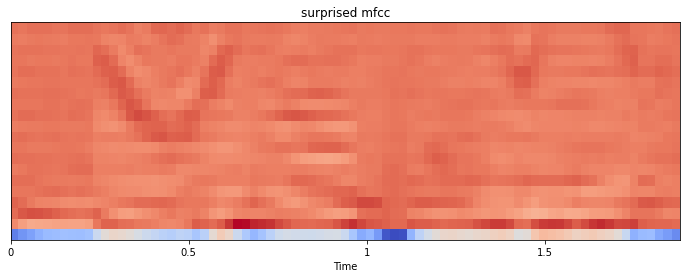

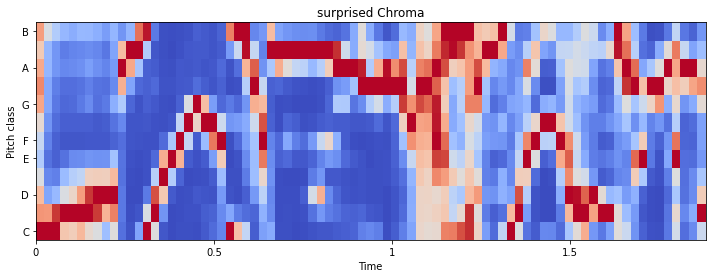

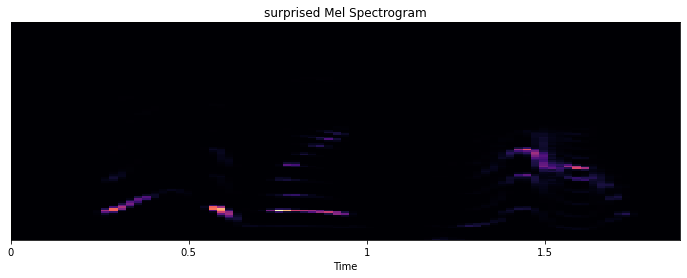

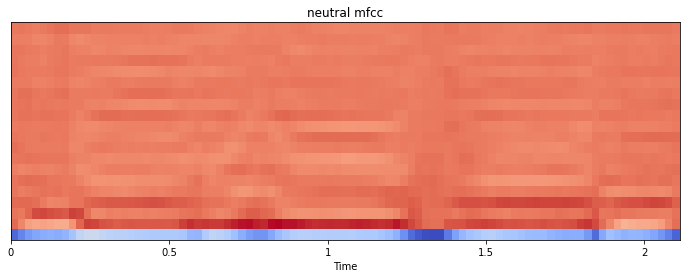

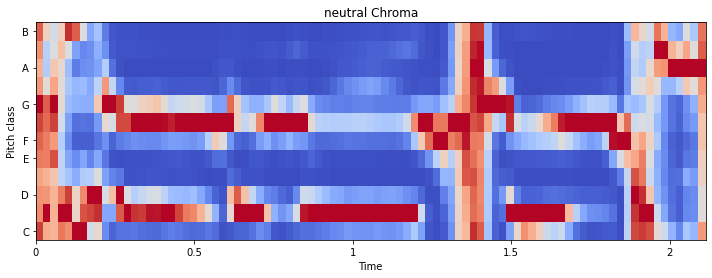

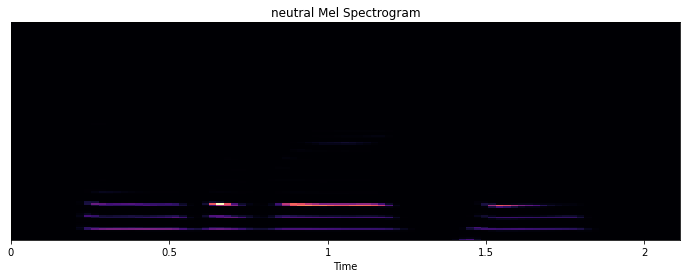

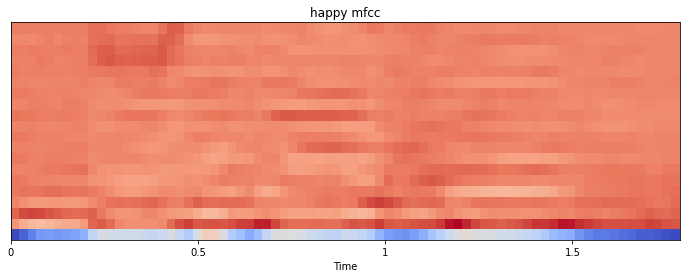

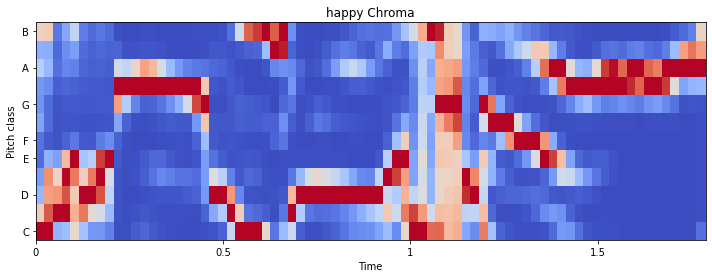

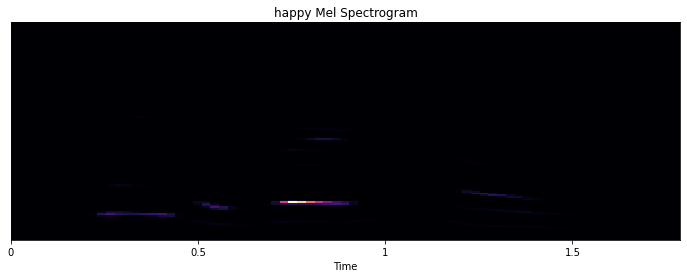

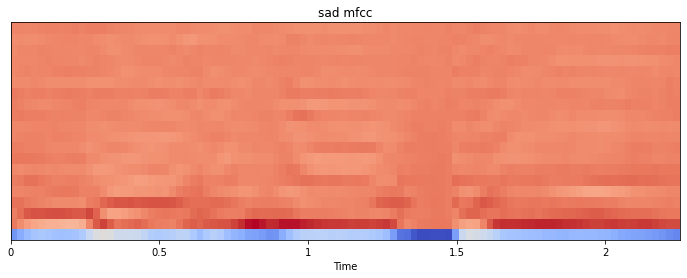

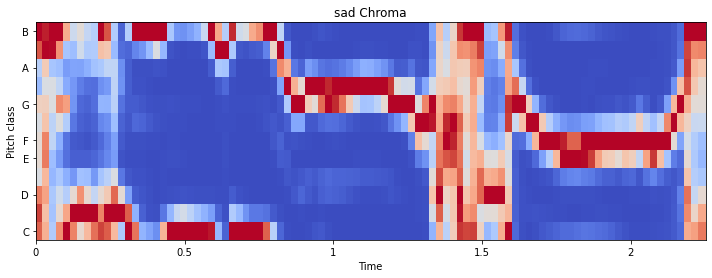

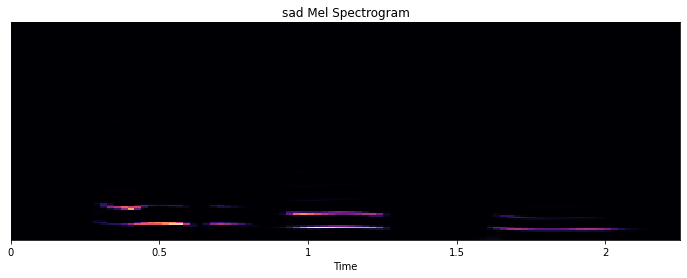

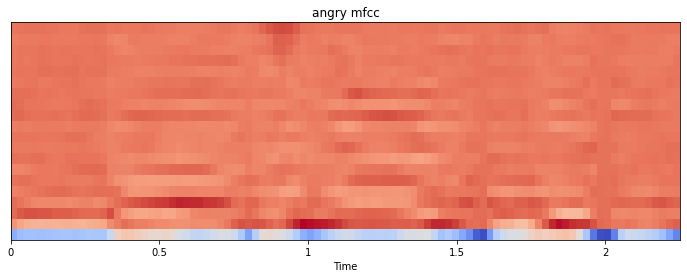

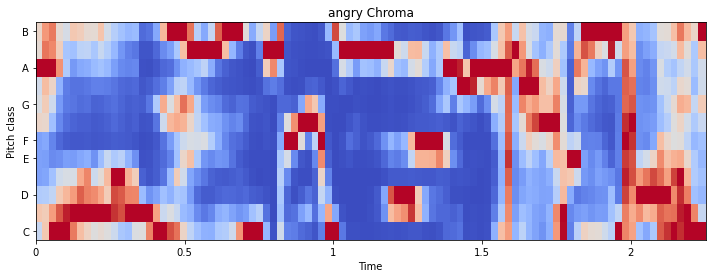

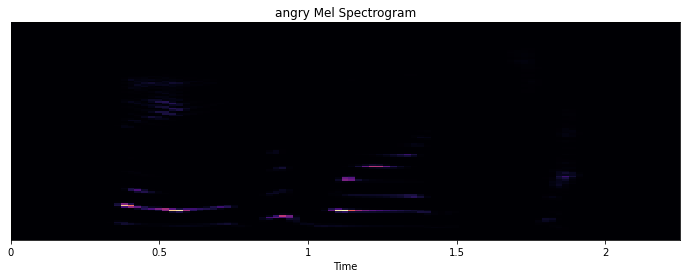

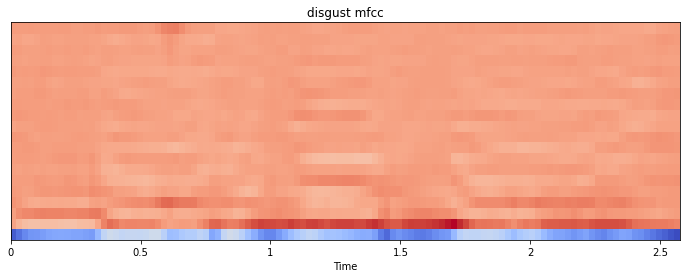

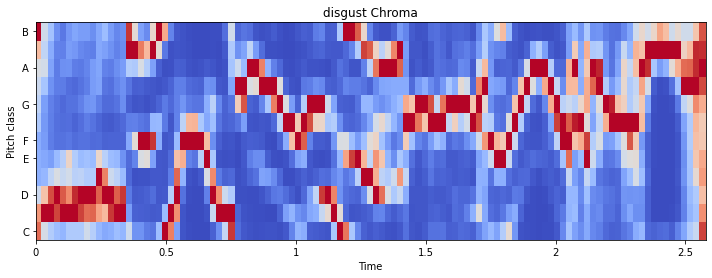

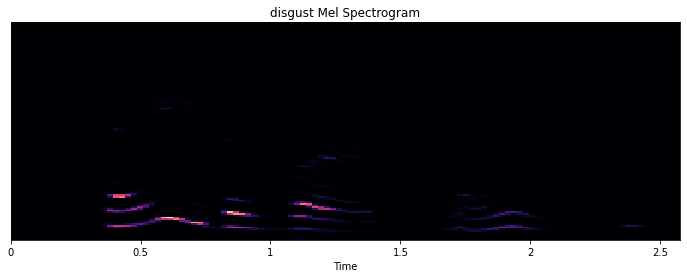

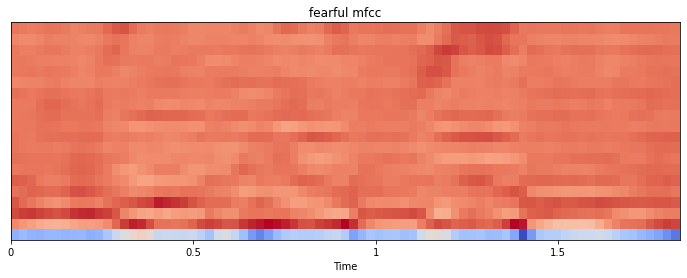

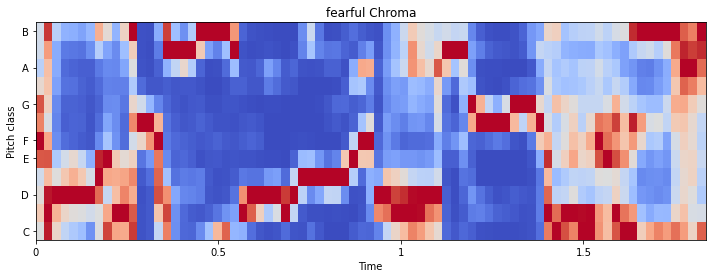

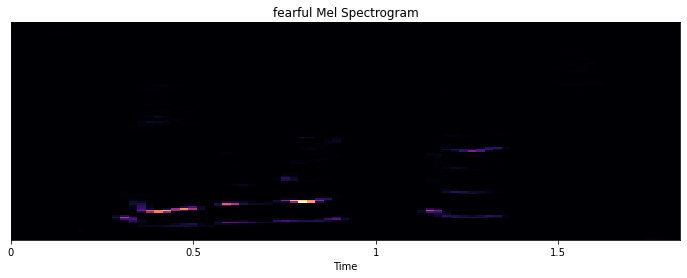

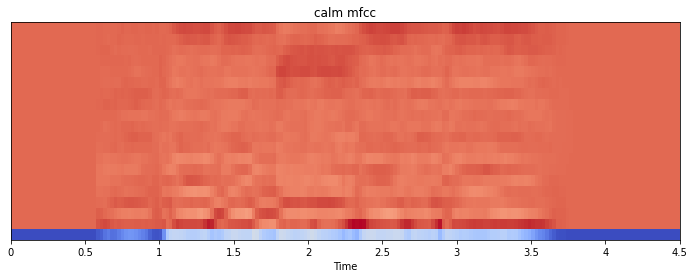

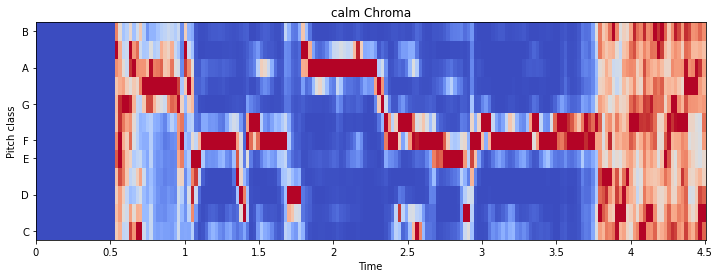

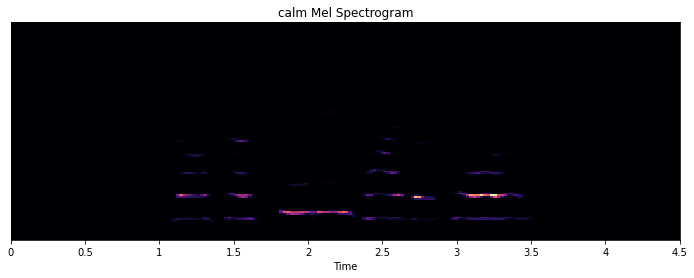

In [ ]:
show_feature()

## Load Data

In [ ]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob('/content/drive/My Drive/Dataset/features/Actor_*/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, train_size= 1.0-test_size, random_state=9)

In [ ]:
import time
x_train,x_test,y_train,y_test=load_data(test_size=0.20)

In [ ]:
def load_data2():
    x,y=[],[]
    for file in glob.glob('/content/drive/My Drive/Dataset/features/Actor_*/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return x, y

In [ ]:
import time
X,Y=load_data2()

In [ ]:
emotionsL=[]
for i in Y:
    emotionsL.append(int(emotions2[i]))
    

In [ ]:
dataset=np.array(X)
emotionsA=np.array(emotionsL)

In [ ]:
print((x_train.shape[0], x_test.shape[0]))

(4201, 1051)


In [ ]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


## Features


In [ ]:
def feat():
  for file in glob.glob('/content/drive/MyDrive/Feature Graph Data/*.wav'):
        z=[]
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        data, sampling_rate = librosa.load(file)

        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        z.append(feature)
        plt.figure(figsize=(12, 5))
        plt.title(emotion)
        plt. plot(z[0])

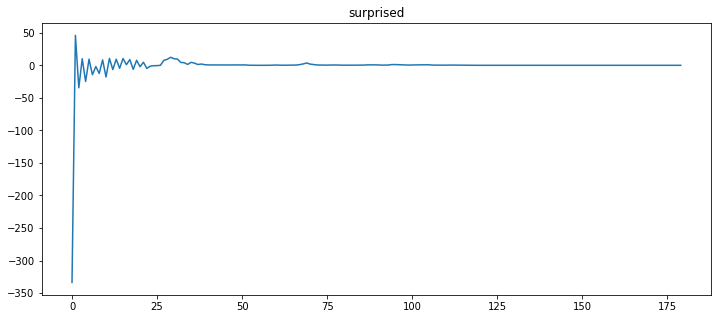

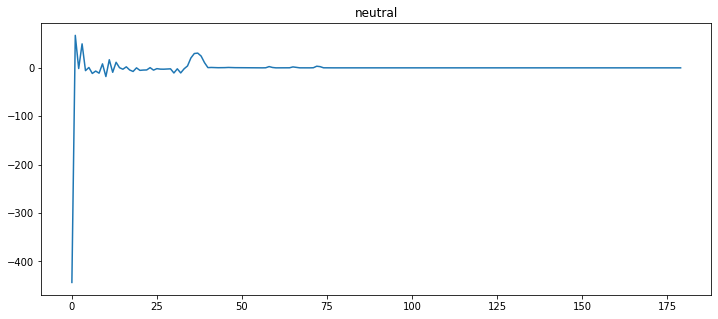

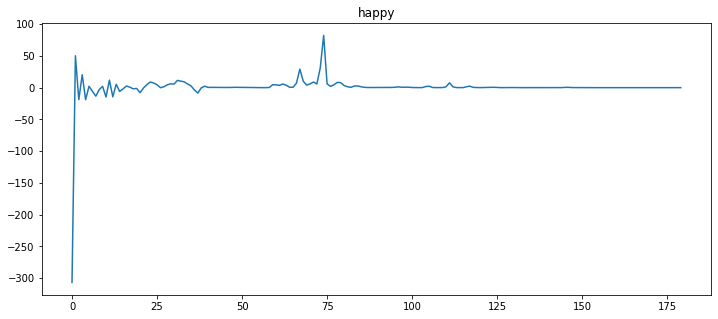

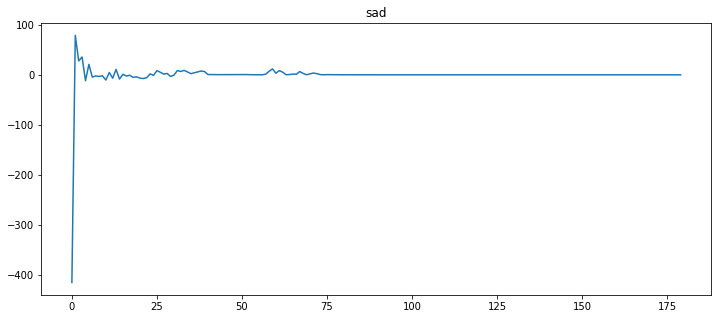

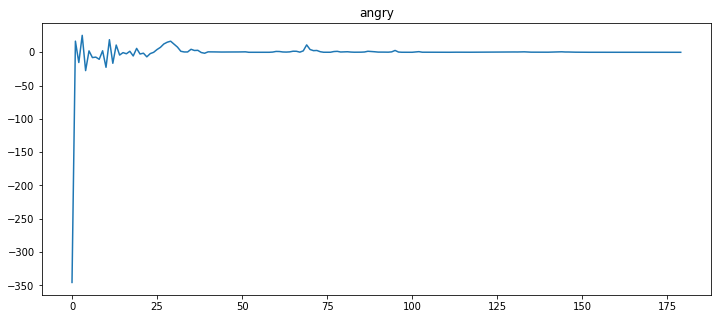

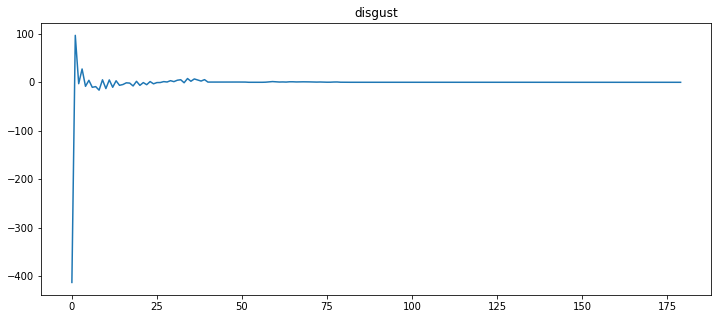

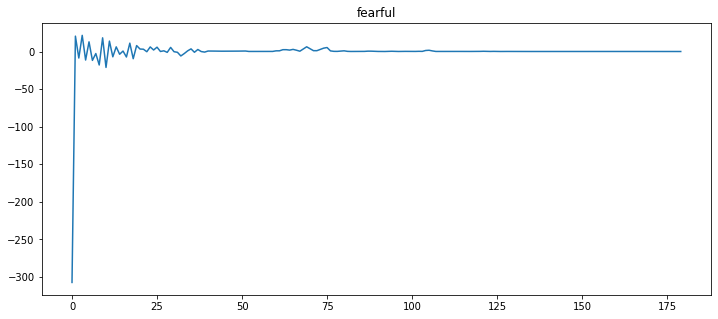

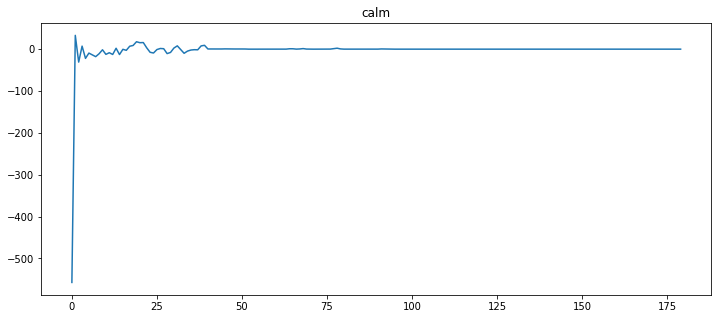

In [ ]:
feat()

## MLP Classifier Model

In [ ]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_pred=model.predict(x_test)

#### Accuracy

In [ ]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 83.44%


#### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       angry       0.92      0.82      0.87       139
        calm       0.88      0.78      0.83        73
     disgust       0.69      0.93      0.79       120
     fearful       0.66      0.90      0.76       151
       happy       0.98      0.74      0.84       167
     neutral       1.00      0.82      0.90       126
         sad       0.92      0.81      0.86       155
   surprised       0.84      0.89      0.86       120

    accuracy                           0.83      1051
   macro avg       0.86      0.84      0.84      1051
weighted avg       0.86      0.83      0.84      1051



#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[114   1   5  14   1   0   1   3]
 [  0  57  10   4   0   0   1   1]
 [  2   1 111   4   0   0   0   2]
 [  2   0   2 136   1   0   7   3]
 [  5   3  11  15 124   0   0   9]
 [  1   1   9   9   0 103   1   2]
 [  0   2   6  21   0   0 125   1]
 [  0   0   7   4   1   0   1 107]]


## K-Cross Validation

In [ ]:
# k cross validation
from sklearn.model_selection import KFold

#Accuracy array
accL=[]
# prepare cross validation
kfold = KFold(10, True, 10)
# enumerate splits
for train, test in kfold.split(dataset, emotionsA):
    model.fit(dataset[train], emotionsA[train])
    y_pred=model.predict(dataset[test])
    accuracy=accuracy_score(y_true=emotionsA[test] , y_pred=y_pred)
    # Print the accuracy
    print("Accuracy: {:.2f}%".format(accuracy*100))
    accL.append(accuracy*100)

AverageAcc= (sum(accL)/10)
print("Average Accuracy: {:.2f}%".format(AverageAcc))

Accuracy: 83.84%
Accuracy: 86.31%
Accuracy: 83.05%
Accuracy: 84.00%
Accuracy: 82.29%
Accuracy: 84.95%
Accuracy: 81.52%
Accuracy: 87.62%
Accuracy: 83.62%
Accuracy: 85.14%
Average Accuracy: 84.23%
